In [25]:
import os
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data_dir = "hubbard_ut6_eps/hubbard_dmrg_3"
l = 3
if l == 2:
    num_cnot = 22
elif l == 3:
    num_cnot = 191
elif l == 4:
    num_cnot = 472
else:
    raise ValueError(f"Invalid dimension {l}")
d_max = 30
d_min = 3

all_files = os.listdir(data_dir)
ev_files = [f for f in all_files if "new_eigenvalues" in f]
print(len(ev_files))

88


In [27]:
# Get the exact energy.
exact_file="hubbard_exact.hdf5"
f_exact = h5py.File(data_dir + "/" + exact_file, "r")
energy_exact = f_exact["energy"][()]
print(f"Exact energy is {energy_exact}.")
f_exact.close()

Exact energy is -2.3661456273201344.


In [28]:
dfs = []
for evf in ev_files:
    fname = data_dir + "/" + evf
    # Get the number of steps.
    f = h5py.File(fname, "r")
    steps = f["steps"][()]
    eps = f["eps"][()]
    f.close()
    # Get the upper bound.
    # fname2 = fname.replace("eigenvalues", "bound")
    # bound_df = pd.read_hdf(fname2)
    # Get the dataframe with energy vs. d
    df = pd.read_hdf(fname, key="eigenvalues")
    df["error"] = abs(df["energy"] - energy_exact)
    df["eps"] = eps
    df["steps"] = steps
    df["num_2q"] = steps * num_cnot
    df.set_index("d")
    # df_concat = pd.concat([df, bound_df], axis=1)
    # dfs.append(df_concat)
    dfs.append(df)
df_total = pd.concat(dfs)
print(df_total)

     d           eps        energy  num_pos         error  steps  num_2q
i                                                                       
0    3  1.000000e-12     -2.359060        3      0.007086    300   57300
1    4  1.000000e-12     -2.361654        4      0.004491    300   57300
2    5  1.000000e-12     -2.364183        5      0.001963    300   57300
3    6  1.000000e-12     -2.365562        6      0.000584    300   57300
4    7  1.000000e-12     -2.366224        7      0.000079    300   57300
..  ..           ...           ...      ...           ...    ...     ...
23  26  1.000000e-07 -13824.879159       10  13822.513013    300   57300
24  27  1.000000e-07 -10409.078067       10  10406.711922    300   57300
25  28  1.000000e-07  -8277.021986       10   8274.655841    300   57300
26  29  1.000000e-07 -29632.225081       11  29629.858935    300   57300
27  30  1.000000e-07 -17863.347009       11  17860.980864    300   57300

[2464 rows x 7 columns]


In [31]:
print(min(df_total["error"]))
print(max(df_total["error"]))

2.2548639098562973e-05
59380.08149560455


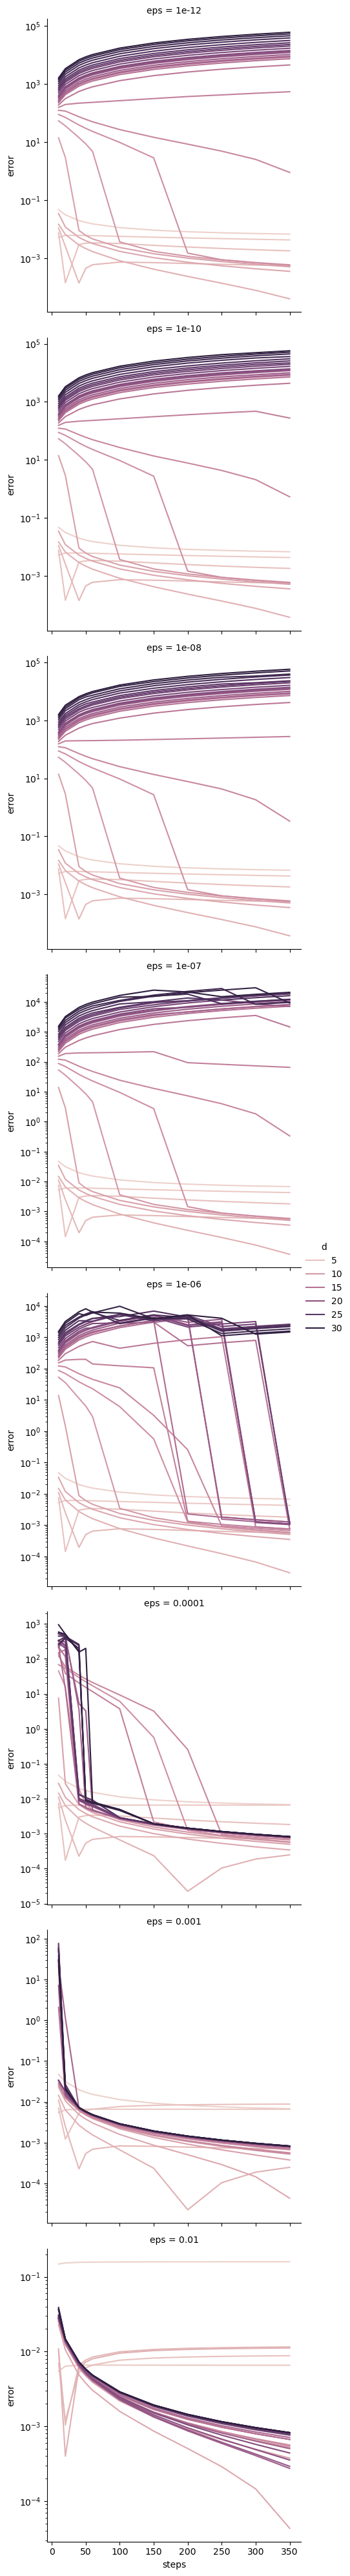

In [36]:
# sns.lineplot(
#     data=df_total,
#     x="steps", y="error",
#     hue="d"
# )

g = sns.relplot(
    data=df_total,
    kind="line",
    x="steps", y="error",
    row="eps",
    hue="d",
    facet_kws=dict(sharey=False)
)
g.set(yscale="log")